In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime
import seaborn
%matplotlib inline

In [2]:
# duration is in ms -> 28080000/(60*60*1000)
# efficiency Calculated sleep efficiency score
# infoCode -> An integer value representing the quality of data collected within the sleep log.
# 0 = Sufficient data to generate a sleep log.
# 1 = Insufficient heart rate data.
# 2 = Sleep period was too short (less than 3 hours).
# 3 = Server-side issue.

fitbit_sleep_daily = pd.read_csv('../data/fitbit_sleep_daily.csv', encoding='utf-8')
fitbit_sleep_daily.drop(['Unnamed: 0'], axis=1, inplace=True)
fitbit_sleep_daily

,date,duration,efficiency,endTime,infoCode,isMainSleep,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,...,rem_thirtyDayAvgMinutes,wake_count,wake_minutes,wake_thirtyDayAvgMinutes,asleep_count,asleep_minutes,awake_count,awake_minutes,restless_count,restless_minutes
0,2023-10-23,28080000,99,2023-10-23T06:40:30.000,0,True,0,422,46,0,...,0.0,29.0,46.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-24,32940000,95,2023-10-24T06:54:30.000,0,True,0,480,69,0,...,95.0,44.0,69.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-25,29760000,94,2023-10-25T06:12:30.000,0,True,2,433,63,0,...,94.0,37.0,63.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-26,26460000,95,2023-10-26T06:05:30.000,0,True,0,385,56,0,...,99.0,27.0,56.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-27,11160000,98,2023-10-27T06:33:30.000,1,True,0,183,3,0,...,NaN,NaN,NaN,NaN,0.0,183.0,1.0,2.0,1.0,1.0
5,2023-10-28,21300000,93,2023-10-28T11:34:30.000,0,True,0,288,67,0,...,99.0,27.0,67.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-10-29,18660000,98,2023-10-29T10:13:30.000,0,True,0,290,21,0,...,80.0,18.0,21.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2023-10-30,29280000,98,2023-10-30T07:03:30.000,0,True,0,435,53,0,...,76.0,40.0,53.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-10-30,29280000,98,2023-10-30T07:03:30.000,0,True,0,435,53,0,...,76.0,40.0,53.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2023-10-31,27480000,99,2023-10-31T06:59:30.000,0,True,0,411,47,0,...,76.0,30.0,47.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fitbit_sleep_daily.columns

Index(['date', 'duration', 'efficiency', 'endTime', 'infoCode', 'isMainSleep',
       'minutesAfterWakeup', 'minutesAsleep', 'minutesAwake',
       'minutesToFallAsleep', 'startTime', 'timeInBed', 'type', 'logType',
       'deep_count', 'deep_minutes', 'deep_thirtyDayAvgMinutes', 'light_count',
       'light_minutes', 'light_thirtyDayAvgMinutes', 'rem_count',
       'rem_minutes', 'rem_thirtyDayAvgMinutes', 'wake_count', 'wake_minutes',
       'wake_thirtyDayAvgMinutes', 'asleep_count', 'asleep_minutes',
       'awake_count', 'awake_minutes', 'restless_count', 'restless_minutes'],
      dtype='object')

In [11]:
fitbit_sleep_daily['date'] = pd.to_datetime(fitbit_sleep_daily['date'])
fitbit_sleep_daily['dow'] = fitbit_sleep_daily['date'].dt.weekday

<Axes: xlabel='date'>

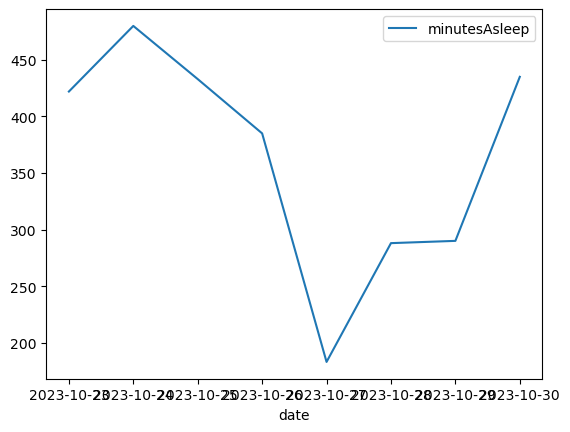

In [4]:
fitbit_sleep_daily.plot(x='date', y='minutesAsleep')

<Axes: title={'center': 'Daily sleep counts rolling mean over 10 days'}, xlabel='date'>

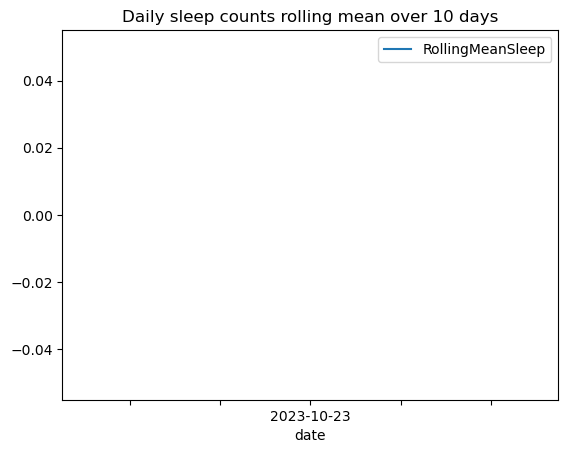

In [7]:
# rolling mean
fitbit_sleep_daily['RollingMeanSleep'] = fitbit_sleep_daily.minutesAsleep.rolling(window=10, center=True).mean()
fitbit_sleep_daily.plot(x='date', y='RollingMeanSleep', title= 'Daily sleep counts rolling mean over 10 days')

Text(0.5, 0, 'Day of Week: 0 = Monday, 6 = Sunday')

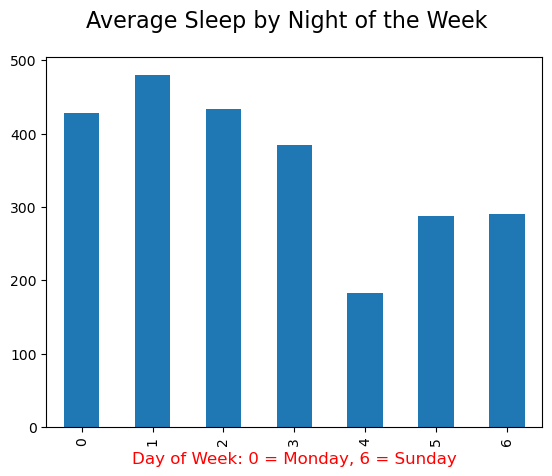

In [12]:
ax = fitbit_sleep_daily.groupby(['dow'])['minutesAsleep'].mean().plot(kind='bar', x='day_of_week')
plt.suptitle('Average Sleep by Night of the Week', fontsize=16)
plt.xlabel('Day of Week: 0 = Monday, 6 = Sunday', fontsize=12, color='red')